In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk

In [3]:
!pip install wordcloud

In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
# Unduh data NLTK yang diperlukan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
# load file
df = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedBluBCA.csv')

In [7]:
# Case folding pada kolom teks (seluruh data)
df['content_casefolding'] = df['content'].str.lower()
df

,content,content_casefolding
0,ok lah,ok lah
1,mantap pisan,mantap pisan
2,sangat memuaskan,sangat memuaskan
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males..."
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc
...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...


In [8]:
# Menghapus tanda baca dari kolom teks
df['content_remove_punct'] = df['content_casefolding'].str.translate(str.maketrans('', '', string.punctuation))
df
#print("Contoh data setelah remove punctuation :")
#df['Tweet'].loc[0]

,content,content_casefolding,content_remove_punct
0,ok lah,ok lah,ok lah
1,mantap pisan,mantap pisan,mantap pisan
2,sangat memuaskan,sangat memuaskan,sangat memuaskan
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc
...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...


In [9]:
# Tokenisasi menggunakan split standar
df['content_tokens'] = df['content_remove_punct'].apply(lambda x: x.split() if isinstance(x, str) else [])
df

,content,content_casefolding,content_remove_punct,content_tokens
0,ok lah,ok lah,ok lah,"[ok, lah]"
1,mantap pisan,mantap pisan,mantap pisan,"[mantap, pisan]"
2,sangat memuaskan,sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]"
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...,"[transfer, bca, ke, blu, pake, biaya, admin, j..."
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]"
...,...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa,"[apakah, sudah, bisa]"
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,"[meski, dak, pakai, kartu, blubca, ttp, keren]"
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ..."
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...,"[keren, bangak, bonusnya, dan, bunganya, trans..."


In [10]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
# Melakukan stemming pada kolom tokens
df['content_stemming'] = df['content_tokens'].apply(lambda words: [stemmer.stem(word) for word in words])
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming
0,ok lah,ok lah,ok lah,"[ok, lah]","[ok, lah]"
1,mantap pisan,mantap pisan,mantap pisan,"[mantap, pisan]","[mantap, pis]"
2,sangat memuaskan,sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, muas]"
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...,"[transfer, bca, ke, blu, pake, biaya, admin, j...","[transfer, bca, ke, blu, pake, biaya, admin, j..."
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]","[mudah, proses, tpi, gak, acc]"
...,...,...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa,"[apakah, sudah, bisa]","[apakah, sudah, bisa]"
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,"[meski, dak, pakai, kartu, blubca, ttp, keren]","[meski, dak, pakai, kartu, blubca, ttp, keren]"
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...","[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ..."
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...,"[keren, bangak, bonusnya, dan, bunganya, trans...","[keren, bangak, bonus, dan, bunga, transfer, j..."


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi'] = df['content_stemming'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi
0,ok lah,ok lah,ok lah,"[ok, lah]","[ok, lah]",ok lah
1,mantap pisan,mantap pisan,mantap pisan,"[mantap, pisan]","[mantap, pis]",mantap pi
2,sangat memuaskan,sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, muas]",sangat muas
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...,"[transfer, bca, ke, blu, pake, biaya, admin, j...","[transfer, bca, ke, blu, pake, biaya, admin, j...",transfer bca ke blu pake biaya admin jd male t...
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]","[mudah, proses, tpi, gak, acc]",mudah prose tpi gak acc
...,...,...,...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa,"[apakah, sudah, bisa]","[apakah, sudah, bisa]",apakah sudah bisa
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,"[meski, dak, pakai, kartu, blubca, ttp, keren]","[meski, dak, pakai, kartu, blubca, ttp, keren]",meski dak pakai kartu blubca ttp keren
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...","[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...",gmnh bos klo udh punya akun tpi lupa email sam...
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...,"[keren, bangak, bonusnya, dan, bunganya, trans...","[keren, bangak, bonus, dan, bunga, transfer, j...",keren bangak bonus dan bunga transfer juga gratis


In [15]:
data = pd.read_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/CleanedBluBCA.csv')
text_column = df['content_normalisasi'].dropna().str.cat(sep=' ')

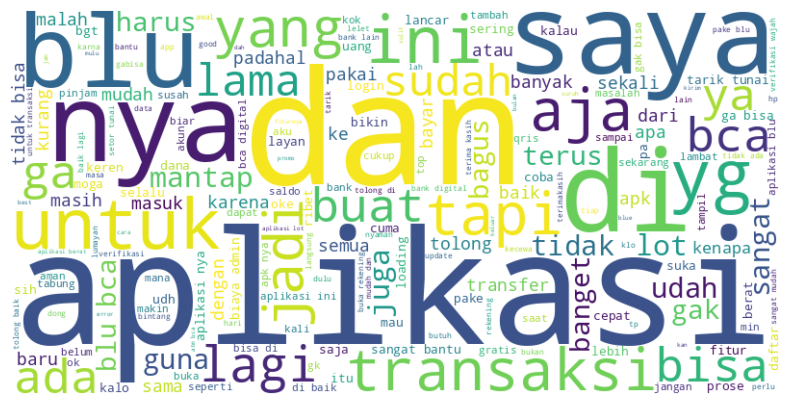

In [16]:
#wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_column)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Mendapatkan frekuensi kata dari word cloud
word_freq = wordcloud.words_

# Mengurutkan frekuensi kata secara menurun
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Membuat array dari kata-kata yang sering muncul
top_words = [word for word, freq in sorted_word_freq]

# Menampilkan array kata-kata yang sering muncul
print(top_words)

['aplikasi', 'dan', 'saya', 'di', 'nya', 'blu', 'untuk', 'yg', 'ini', 'tapi', 'aja', 'transaksi', 'yang', 'jadi', 'lagi', 'bca', 'ada', 'ga', 'bisa', 'buat', 'ya', 'lama', 'sudah', 'mantap', 'lot', 'juga', 'tidak', 'sangat', 'guna', 'udah', 'gak', 'bagus', 'terus', 'banget', 'harus', 'blu bca', 'padahal', 'sama', 'masuk', 'dari', 'baru', 'tolong', 'karena', 'pakai', 'apa', 'apk', 'ke', 'baik', 'transfer', 'banyak', 'malah', 'dengan', 'mudah', 'masih', 'semua', 'tidak bisa', 'sekali', 'bayar', 'atau', 'kurang', 'kenapa', 'sangat bantu', 'bikin', 'itu', 'cuma', 'cepat', 'coba', 'aplikasi nya', 'lancar', 'lebih', 'login', 'uang', 'moga', 'fitur', 'kalo', 'pake', 'daftar', 'berat', 'ribet', 'biaya admin', 'bgt', 'keren', 'mau', 'tarik tunai', 'suka', 'sih', 'pa', 'sering', 'ga bisa', 'prose', 'selalu', 'kalau', 'layan', 'dana', 'loading', 'saja', 'oke', 'udh', 'aplikasi ini', 'top', 'gratis', 'seperti', 'aman', 'makin', 'mana', 'saldo', 'qris', 'aku', 'di baik', 'saat', 'susah', 'kok', 'ok

In [18]:
# Daftar kata stopword tambahan
additional_stopwords = ['blubaca', 'blu', 'blu bca', 'bca']
# Ambil daftar stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan kata-kata stopword tambahan ke dalam set stop_words
stop_words.update(additional_stopwords)

# Lakukan stopword removal pada kolom 'Tweet_tokens' dan simpan hasilnya pada kolom 'Tweet_stopword'
df['content_stopword'] = df['content_tokens'].apply(lambda words: [word for word in words if word.lower() not in stop_words])

# Tampilkan DataFrame yang sudah diperbarui
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword
0,ok lah,ok lah,ok lah,"[ok, lah]","[ok, lah]",ok lah,[ok]
1,mantap pisan,mantap pisan,mantap pisan,"[mantap, pisan]","[mantap, pis]",mantap pi,"[mantap, pisan]"
2,sangat memuaskan,sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, muas]",sangat muas,[memuaskan]
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...,"[transfer, bca, ke, blu, pake, biaya, admin, j...","[transfer, bca, ke, blu, pake, biaya, admin, j...",transfer bca ke blu pake biaya admin jd male t...,"[transfer, pake, biaya, admin, jd, males, top,..."
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]","[mudah, proses, tpi, gak, acc]",mudah prose tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]"
...,...,...,...,...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa,"[apakah, sudah, bisa]","[apakah, sudah, bisa]",apakah sudah bisa,[]
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,"[meski, dak, pakai, kartu, blubca, ttp, keren]","[meski, dak, pakai, kartu, blubca, ttp, keren]",meski dak pakai kartu blubca ttp keren,"[dak, pakai, kartu, blubca, ttp, keren]"
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...","[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...",gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, akun, tpi, lupa, email, ..."
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...,"[keren, bangak, bonusnya, dan, bunganya, trans...","[keren, bangak, bonus, dan, bunga, transfer, j...",keren bangak bonus dan bunga transfer juga gratis,"[keren, bangak, bonusnya, bunganya, transfer, ..."


In [19]:
# Normalisasi pada kolom teks
lemmatizer = WordNetLemmatizer()
df['content_normalisasi2'] = df['content_stopword'].apply(lambda word_list: ' '.join([lemmatizer.lemmatize(word) for word in word_list]))
df

,content,content_casefolding,content_remove_punct,content_tokens,content_stemming,content_normalisasi,content_stopword,content_normalisasi2
0,ok lah,ok lah,ok lah,"[ok, lah]","[ok, lah]",ok lah,[ok],ok
1,mantap pisan,mantap pisan,mantap pisan,"[mantap, pisan]","[mantap, pis]",mantap pi,"[mantap, pisan]",mantap pisan
2,sangat memuaskan,sangat memuaskan,sangat memuaskan,"[sangat, memuaskan]","[sangat, muas]",sangat muas,[memuaskan],memuaskan
3,"Transfer BCA ke Blu pake biaya admin, jd males...","transfer bca ke blu pake biaya admin, jd males...",transfer bca ke blu pake biaya admin jd males ...,"[transfer, bca, ke, blu, pake, biaya, admin, j...","[transfer, bca, ke, blu, pake, biaya, admin, j...",transfer bca ke blu pake biaya admin jd male t...,"[transfer, pake, biaya, admin, jd, males, top,...",transfer pake biaya admin jd male top up
4,Mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,mudah prosesnya tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]","[mudah, proses, tpi, gak, acc]",mudah prose tpi gak acc,"[mudah, prosesnya, tpi, gak, acc]",mudah prosesnya tpi gak acc
...,...,...,...,...,...,...,...,...
4534,Apakah sudah bisa ?,apakah sudah bisa ?,apakah sudah bisa,"[apakah, sudah, bisa]","[apakah, sudah, bisa]",apakah sudah bisa,[],
4535,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,meski dak pakai kartu blubca ttp keren,"[meski, dak, pakai, kartu, blubca, ttp, keren]","[meski, dak, pakai, kartu, blubca, ttp, keren]",meski dak pakai kartu blubca ttp keren,"[dak, pakai, kartu, blubca, ttp, keren]",dak pakai kartu blubca ttp keren
4536,Gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...","[gmnh, bos, klo, udh, punya, akun, tpi, lupa, ...",gmnh bos klo udh punya akun tpi lupa email sam...,"[gmnh, bos, klo, udh, akun, tpi, lupa, email, ...",gmnh bos klo udh akun tpi lupa email no hpnya ...
4537,Keren bangak bonusnya dan bunganya. Transfer j...,keren bangak bonusnya dan bunganya. transfer j...,keren bangak bonusnya dan bunganya transfer ju...,"[keren, bangak, bonusnya, dan, bunganya, trans...","[keren, bangak, bonus, dan, bunga, transfer, j...",keren bangak bonus dan bunga transfer juga gratis,"[keren, bangak, bonusnya, bunganya, transfer, ...",keren bangak bonusnya bunganya transfer gratis


In [20]:
df.drop(df.columns[[0,1,2,3,4,5,6]], axis = 1, inplace = True)
df.head()

,content_normalisasi2
0,ok
1,mantap pisan
2,memuaskan
3,transfer pake biaya admin jd male top up
4,mudah prosesnya tpi gak acc


In [22]:
# Menyimpan data yang telah dibersihkan
df.to_csv('/content/drive/MyDrive/Sentimen Analisis 3 Top Bank Digital/ProssedBluBCA.csv', index=False)